In [64]:
%load_ext nb_black
%reload_ext autoreload
%autoreload 2

from IPython.core.display import display, HTML

display(HTML("<style>.container { width:85% !important; }</style>"))

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [119]:
import os

from scipy import stats
import pandas as pd
import numpy as np
from typing import Dict


# ML libraries
import pymc3 as pm
from sklearn.linear_model import LinearRegression


# Plotting and viz
import matplotlib.pyplot as plt
import seaborn as sns

# Custom libraries
from feature_factory import FeatureFactory


plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["font.size"] = 15

<IPython.core.display.Javascript object>

In [3]:
P_ROOT = "../../../hts-forecast/volume/m5-forecasting-accuracy/"

df_sales = pd.read_parquet(os.path.join(P_ROOT, "walmart_m5_sales_dep_state.parquet"))

<IPython.core.display.Javascript object>

In [45]:
df_sales_state = df_sales.pivot_table(
    index=["cat_id", "dept_id", "date"], columns="state_id", values="qty"
).reset_index().set_index("date").rename_axis(None, axis=0)


<IPython.core.display.Javascript object>

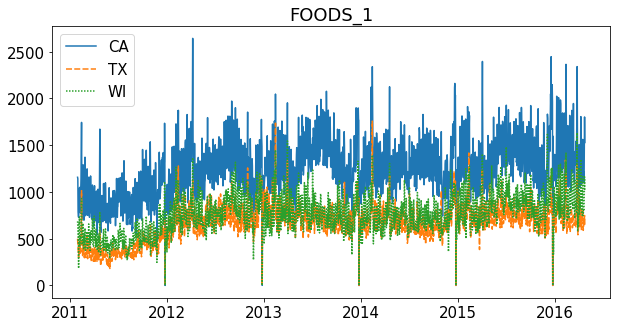

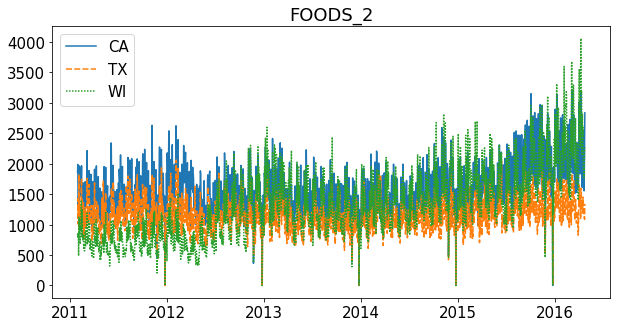

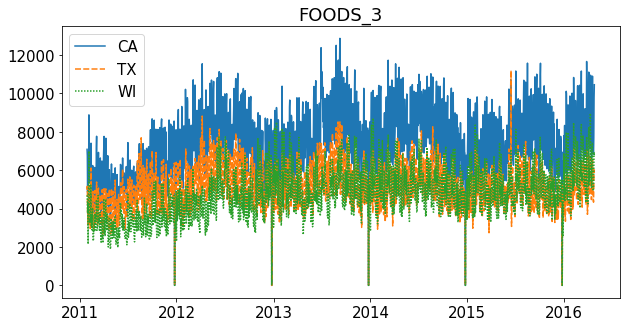

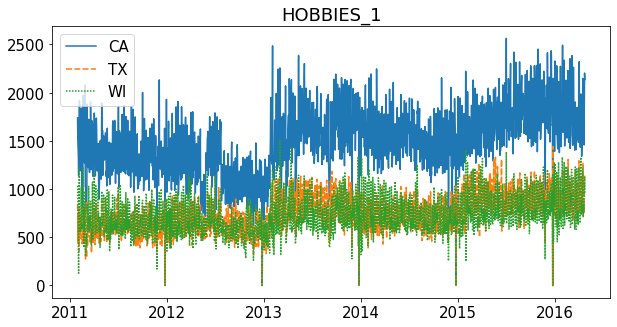

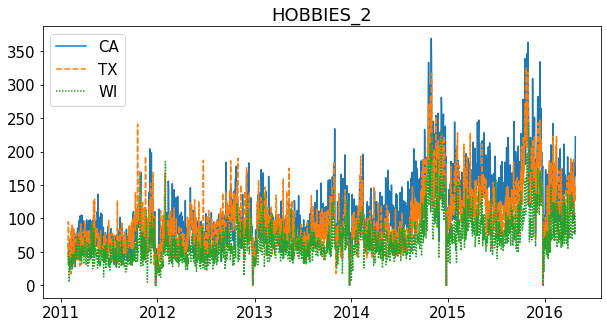

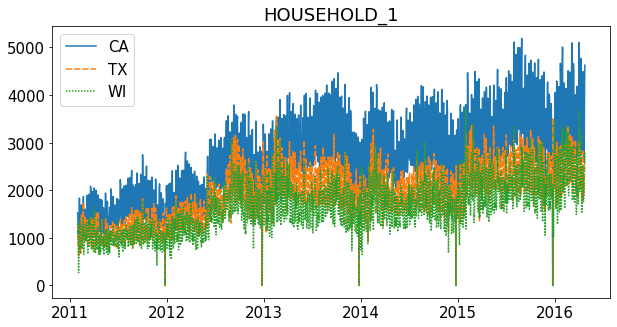

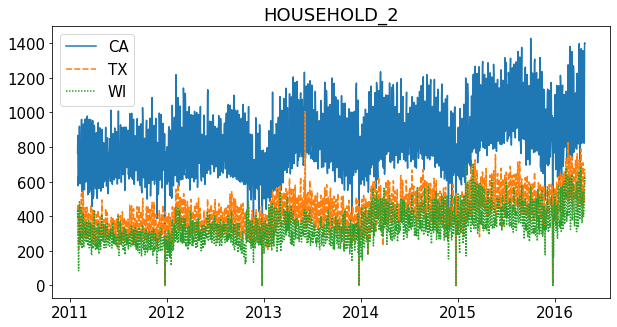

<IPython.core.display.Javascript object>

In [46]:
for name, df_grp in df_sales_state.groupby(["cat_id", "dept_id"]):
    sns.lineplot(data=df_grp.drop(["cat_id", "dept_id"], axis="columns"))
    plt.title("{x}".format(x=name[-1]))
    plt.legend()
    plt.show()

In [47]:
df_sales_state.groupby("dept_id").sum().sort_values(by="CA", ascending=False)

state_id,CA,TX,WI
dept_id,,,
FOODS_3,13872630,9503642,8995804
HOUSEHOLD_1,4885015,3560292,3055219
FOODS_2,2957744,2167147,2504931
HOBBIES_1,2827183,1406662,1362615
FOODS_1,2365928,1285632,1436481
HOUSEHOLD_2,1554347,789954,635843
HOBBIES_2,212700,185677,129963


<IPython.core.display.Javascript object>

In [53]:
df_foods_3 = df_sales.query("dept_id in ['FOODS_3']")

<IPython.core.display.Javascript object>

In [54]:
df_foods_3

,cat_id,dept_id,state_id,date,qty
11478,FOODS,FOODS_3,CA,2011-01-29,7080
11479,FOODS,FOODS_3,CA,2011-01-30,6733
11480,FOODS,FOODS_3,CA,2011-01-31,4842
11481,FOODS,FOODS_3,CA,2011-02-01,5669
11482,FOODS,FOODS_3,CA,2011-02-02,5210
...,...,...,...,...,...
17212,FOODS,FOODS_3,WI,2016-04-20,4917
17213,FOODS,FOODS_3,WI,2016-04-21,5072
17214,FOODS,FOODS_3,WI,2016-04-22,5836
17215,FOODS,FOODS_3,WI,2016-04-23,6916


<IPython.core.display.Javascript object>

In [68]:
# Build Feature Factory

<IPython.core.display.Javascript object>

In [85]:
ff = FeatureFactory()

<IPython.core.display.Javascript object>

In [86]:
df_features = ff.calendar_features(df_foods_3)

<IPython.core.display.Javascript object>

In [91]:
df_features = df_features.set_index(["cat_id", "dept_id", "state_id", "date"])

<IPython.core.display.Javascript object>

In [92]:
df_features.head()

qty  day_of_week  week_of_month  \
cat_id dept_id state_id date                                           
FOODS  FOODS_3 CA       2011-01-29  7080            5              5   
                        2011-01-30  6733            6              5   
                        2011-01-31  4842            0              6   
                        2011-02-01  5669            1              1   
                        2011-02-02  5210            2              1   

                                    week_of_year  month  
cat_id dept_id state_id date                             
FOODS  FOODS_3 CA       2011-01-29             4      1  
                        2011-01-30             4      1  
                        2011-01-31             5      1  
                        2011-02-01             5      2  
                        2011-02-02             5      2

<IPython.core.display.Javascript object>

In [ ]:
# Building a learning pipeline 

In [93]:
X, y = df_features[ff.features], df_features["qty"]

<IPython.core.display.Javascript object>

In [96]:
# Sklearn pipeline
# Column Transformer
# Model
# k-fold cross-validation (or time series cross-val)
# hyper-parameter tuning

<IPython.core.display.Javascript object>

In [98]:
# Generate synthetic data
# Regression 

# Time Series 

# Hierarchical Time Series Regression 

# Using it for Multiple Testing Problems

<IPython.core.display.Javascript object>

In [155]:
n = 1000
w_opt_a = np.array([1, 3.5, 6])
w_opt_b = np.array([-1, -3.5, -6])
m = len(w_opt)

X = stats.norm.rvs(size=(n * 2, m), loc=0, scale=1)

X_a, X_b = X[0:n], X[n:]


y = np.append((X_a @ w_opt_a), (X_b @ w_opt_b)) + stats.norm.rvs(
    size=n * 2, loc=0, scale=0.5
)


<IPython.core.display.Javascript object>

In [153]:
w = np.linalg.inv((X.T @ X)) @ (X.T @ y)

print(w)

# lin_mod = LinearRegression(fit_intercept=False)
# lin_mod.fit(X, y)
# lin_mod.coef_

[-0.00124967  0.08613916 -0.36358573]


<IPython.core.display.Javascript object>

In [148]:
with pm.Model() as mod:
    w_ = pm.Normal(name="w", mu=0, sigma=10, shape=m)
    sigma = pm.InverseGamma("sigma", mu=1, sigma=10)
    obs = pm.Normal(name="obs", observed=y, mu=X @ w_, sigma=sigma)
    trace = pm.sample(draws=1000)

<IPython.core.display.Javascript object>

/opt/anaconda3/envs/homework/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


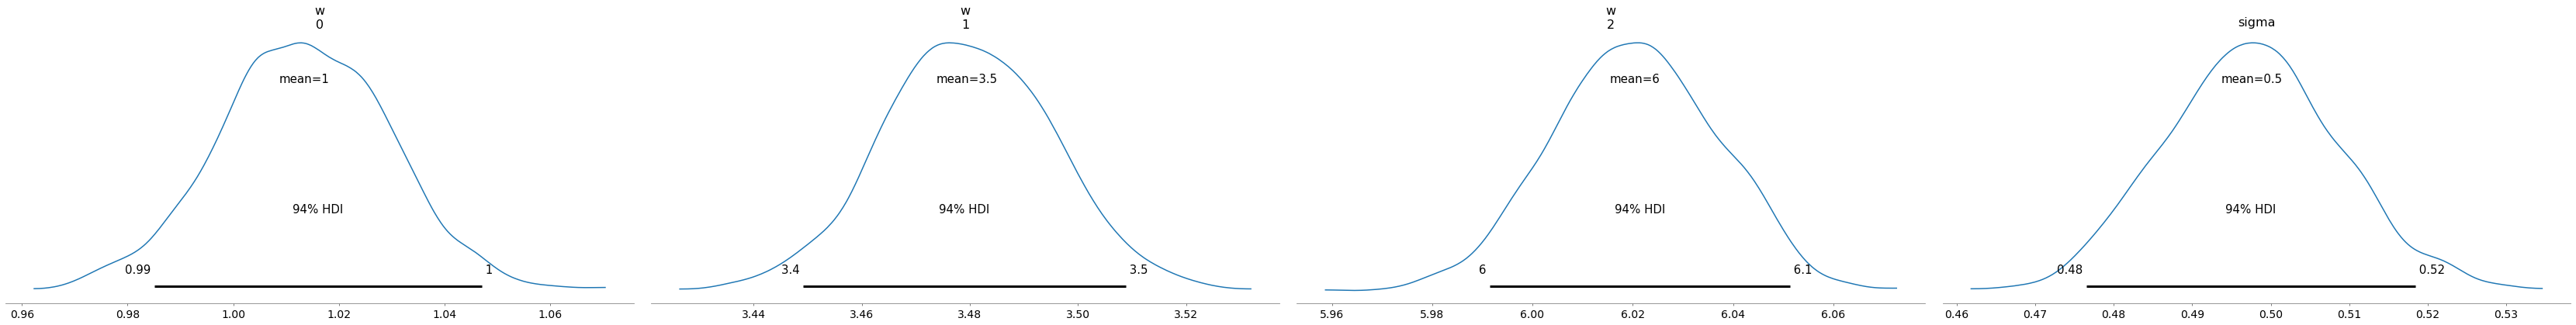

<IPython.core.display.Javascript object>

In [149]:
pm.plot_posterior(trace)
plt.show()

In [296]:
index_cols = np.append(
    np.zeros(len(X_a), dtype=np.int8), np.ones(len(X_b), dtype=np.int8)
)
index_rows = np.arange(n * 2)

with pm.Model() as ind_mod:
    w_ind = pm.Normal(name="w", mu=0, sigma=10, shape=(m, 2))
    sigma = pm.InverseGamma("sigma", mu=1, sigma=10)
    #  mu = pm.Deterministic(name="mu", var=(X @ w_ind)[index_rows, index_cols])
    mu = (X @ w_ind)[index_rows, index_cols]
    obs = pm.Normal(name="obs", observed=y, mu=mu, sigma=sigma)
    trace = pm.sample(draws=1500)

/opt/anaconda3/envs/homework/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


<IPython.core.display.Javascript object>

In [276]:
trace.get_values(varname="mu").shape

(3000, 2000)

<IPython.core.display.Javascript object>

In [279]:
trace.get_values(varname="w").shape

(3000, 3, 2)

<IPython.core.display.Javascript object>

/opt/anaconda3/envs/homework/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/opt/anaconda3/envs/homework/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


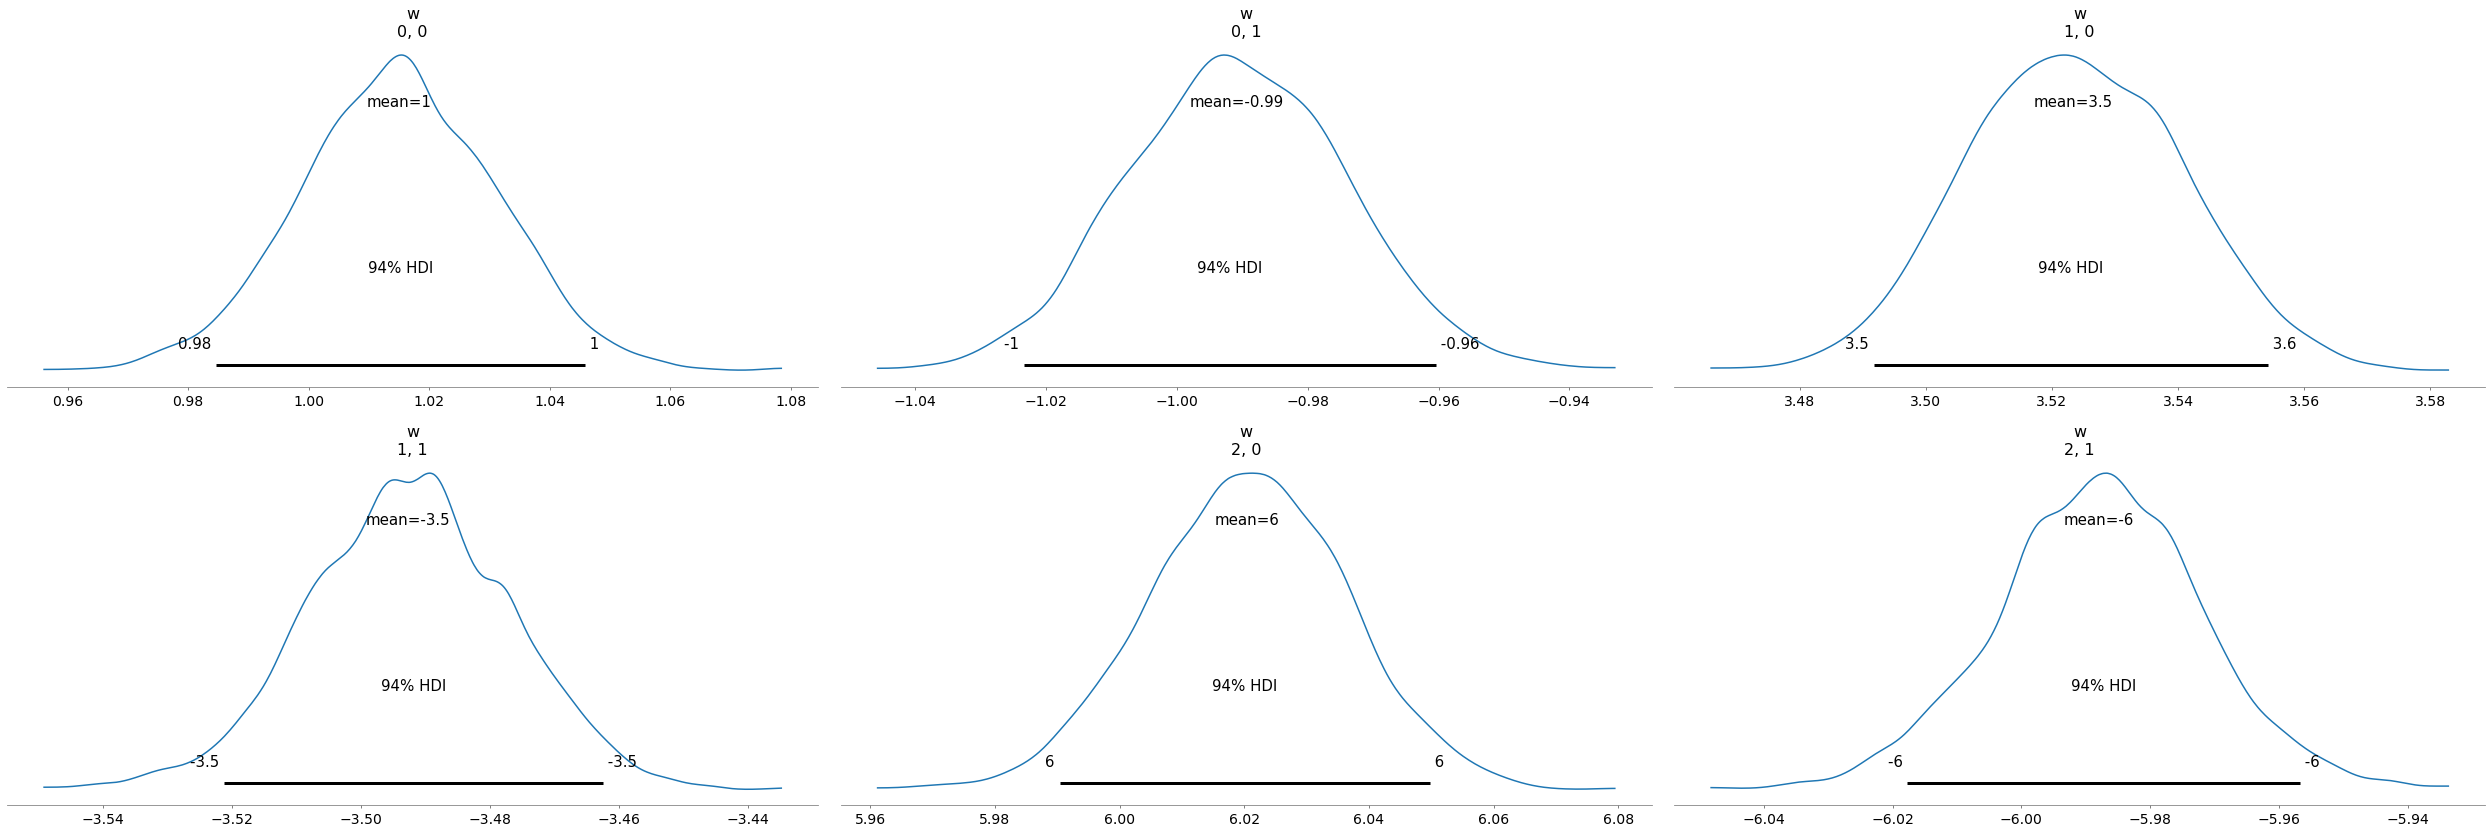

<IPython.core.display.Javascript object>

In [293]:
pm.plot_posterior(trace, var_names=["w"])
plt.show()

In [297]:
with ind_mod:
    display(pm.summary(trace))

/opt/anaconda3/envs/homework/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
"w[0,0]",1.015,0.016,0.985,1.046,0.0,0.0,5261.0,5261.0,5254.0,2294.0,1.0
"w[0,1]",-0.991,0.017,-1.021,-0.958,0.0,0.0,4584.0,4576.0,4604.0,2646.0,1.0
"w[1,0]",3.523,0.017,3.492,3.557,0.0,0.0,4411.0,4405.0,4411.0,2115.0,1.0
"w[1,1]",-3.493,0.016,-3.522,-3.464,0.0,0.0,5331.0,5331.0,5371.0,2894.0,1.0
"w[2,0]",6.020,0.016,5.991,6.052,0.0,0.0,4980.0,4978.0,4963.0,2178.0,1.0
"w[2,1]",-5.988,0.017,-6.020,-5.958,0.0,0.0,3809.0,3809.0,3826.0,2567.0,1.0
sigma,0.509,0.008,0.494,0.525,0.0,0.0,5005.0,5005.0,4977.0,1991.0,1.0


<IPython.core.display.Javascript object>

In [262]:
w_both = np.array([w_opt_a, w_opt_b]).T
w_both

(X @ w_both)[index_rows, index_cols]

array([-4.52477179,  9.75929095,  0.95484502, ..., 13.6866123 ,
        1.48944087,  2.39513525])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>